# SVM & Naive bayes

# Theoretical

 1. What is a Support Vector Machine (SVM)?
 - A Support Vector Machine is a supervised learning algorithm used for classification and regression. It aims to find the optimal hyperplane that best separates classes in the feature space.
 2. What is the difference between Hard Margin and Soft Margin SVM?
 - Hard Margin: Assumes data is linearly separable with no misclassification allowed. Maximizes the margin strictly.
 - Soft Margin: Allows some misclassification using a penalty term (C). Balances margin maximization and classification errors.
 3. What is the mathematical intuition behind SVM?
 - SVM tries to maximize the margin (distance) between the decision boundary and the nearest data points (support vectors) while minimizing classification errors.


 4. What is the role of Lagrange Multipliers in SVM?
 - Lagrange multipliers are used to convert the constrained optimization problem (maximize margin) into a dual problem that’s easier to solve, especially when using kernels.


 5. What are Support Vectors in SVM?
 - Support Vectors are the data points that lie closest to the decision boundary. They determine the position and orientation of the hyperplane.
 6. What is a Support Vector Classifier (SVC)?
 - SVC is the classification implementation of SVM. It constructs a hyperplane to classify data into categories.
 7. What is a Support Vector Regressor (SVR)?
 - SVR is the regression counterpart of SVM. It finds a function within a threshold (epsilon) from the actual values, minimizing error beyond that.


 8. What is the Kernel Trick in SVM?
 - The kernel trick transforms data into a higher-dimensional space without explicitly computing coordinates. It enables linear separation in the transformed space using functions like RBF, Polynomial, etc.
 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?
 - Linear Kernel: Best for linearly separable data. Fast and interpretable.

- Polynomial Kernel: Good for capturing interaction features. More flexible but computationally intensive.

- RBF Kernel: Highly flexible, handles non-linear data well. Sensitive to parameters.
10. What is the effect of the C parameter in SVM?
- C controls the trade-off between maximizing the margin and minimizing classification error:

- Large C: Less tolerance for misclassification (hard margin).

- Small C: More tolerant of misclassification (soft margin).
11. What is the role of the Gamma parameter in RBF Kernel SVM?
- Gamma defines how far the influence of a single training example reaches:

- Low Gamma: Far reach, smoother decision boundary.

- High Gamma: Close reach, complex boundaries, risk of overfitting.
12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
- Naïve Bayes is a probabilistic classifier based on Bayes’ Theorem, assuming independence among features — hence the term “naïve.”


 13. What is Bayes’ Theorem?
 - P(A∣B)=
P(B)
P(B∣A)⋅P(A)
​

It describes the probability of a hypothesis
𝐴
A given evidence
𝐵
B, updating beliefs based on new evidence.
14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?
- Gaussian NB: Assumes features follow a normal distribution. Used for continuous data.

- Multinomial NB: Used for count data (e.g., word counts in text).

- Bernoulli NB: Assumes binary features (e.g., word presence/absence in text).

15. When should you use Gaussian Naïve Bayes over other variants?
- Use Gaussian NB when features are continuous and normally distributed — common in medical data, sensor data, etc.
16. What are the key assumptions made by Naïve Bayes?
- Conditional Independence of features given the class.

- All features contribute equally and independently to the outcome.
17. What are the advantages and disadvantages of Naïve Bayes?
 - Advantages:

Simple, fast, efficient

Works well with high-dimensional data

Performs well for text classification

   - Disadvantages:

Assumes feature independence (rare in real data)

Poor estimation for zero-frequency (resolved with smoothing)


 18. Why is Naïve Bayes a good choice for text classification?
 - Because it handles high-dimensional, sparse, and independent features (like word presence or frequency) well. It is also fast and effective with large datasets.

 19. Compare SVM and Naïve Bayes for classification tasks?
 - SVM:
   - slower
   - Higher in complex settings
   - Moderate
 - Naïve Bayes:
  -   Very fast
  - Good for simple, text-based
  - 	High
 20. How does Laplace Smoothing help in Naïve Bayes?
 - Laplace Smoothing avoids zero probabilities by adding 1 to all feature counts. This ensures unseen events in training don't get zero probability in prediction.



# Practical

21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier on Iris dataset: {accuracy:.2f}")


Accuracy of SVM Classifier on Iris dataset: 0.97


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Compare accuracies
print(f"Accuracy with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy with RBF Kernel: {accuracy_rbf:.2f}")

# Optionally, compare performance
if accuracy_linear > accuracy_rbf:
    print("Linear Kernel performed better.")
elif accuracy_rbf > accuracy_linear:
    print("RBF Kernel performed better.")
else:
    print("Both kernels performed equally well.")


Accuracy with Linear Kernel: 0.97
Accuracy with RBF Kernel: 1.00
RBF Kernel performed better.


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE):

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of SVR on housing dataset: {mse:.4f}")


Mean Squared Error (MSE) of SVR on housing dataset: 0.3245


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary:

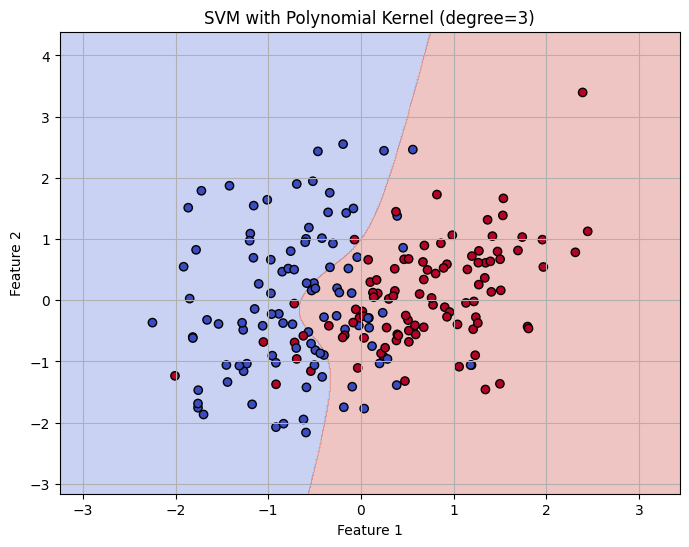

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate synthetic 2D classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')
svm_poly.fit(X_scaled, y)

# Plotting decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Visualize decision boundary
plot_decision_boundary(svm_poly, X_scaled, y, "SVM with Polynomial Kernel (degree=3)")


25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: {accuracy:.2f}")


Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: 0.97


26.  Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset (subset for speed)
categories = ['rec.sport.baseball', 'sci.space', 'talk.politics.misc', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Extract features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Naïve Bayes on 20 Newsgroups subset: {accuracy:.2f}\n")

# Optional: Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy of Multinomial Naïve Bayes on 20 Newsgroups subset: 0.89

Classification Report:
                    precision    recall  f1-score   support

     comp.graphics       0.93      0.90      0.91       210
rec.sport.baseball       0.83      0.95      0.89       192
         sci.space       0.96      0.83      0.89       196
talk.politics.misc       0.86      0.89      0.87       148

          accuracy                           0.89       746
         macro avg       0.89      0.89      0.89       746
      weighted avg       0.90      0.89      0.89       746



27. Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually

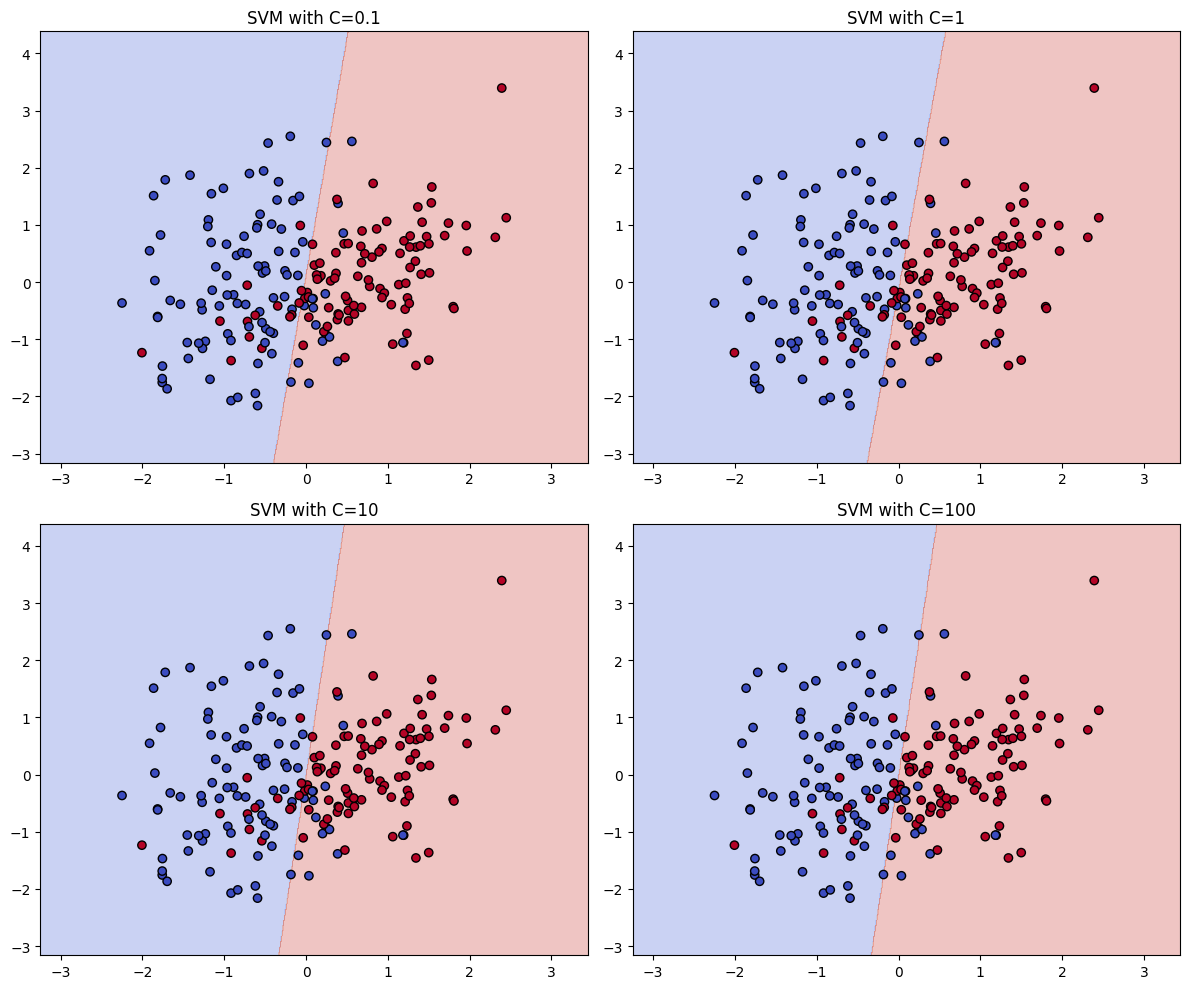

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate a synthetic 2D classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define C values to compare
C_values = [0.1, 1, 10, 100]

# Plot decision boundaries for each C value
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_scaled, y)
    plot_decision_boundary(svm, X_scaled, y, axes[idx], f"SVM with C={C}")

plt.tight_layout()
plt.show()


28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features=

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=0, n_classes=2, random_state=42)

# Binarize the features (convert to binary: 0 or 1)
binarizer = Binarizer(threshold=0.0)
X_binary = binarizer.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Train Bernoulli Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict on the test set
y_pred = bnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bernoulli Naïve Bayes: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of Bernoulli Naïve Bayes: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       101
           1       0.76      0.75      0.75        99

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



29. Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_wine()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM on unscaled data
svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM on scaled data
svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare results
print(f"Accuracy without Scaling: {accuracy_unscaled:.2f}")
print(f"Accuracy with Scaling:    {accuracy_scaled:.2f}")


Accuracy without Scaling: 0.81
Accuracy with Scaling:    1.00


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 1. Gaussian Naive Bayes (no Laplace needed for continuous data)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# --- 2. Discretize data for MultinomialNB (needed for Laplace smoothing)
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_discrete = kbd.fit_transform(X_train)
X_test_discrete = kbd.transform(X_test)

# MultinomialNB without Laplace smoothing (alpha=0)
mnb_no_smooth = MultinomialNB(alpha=0.0)
mnb_no_smooth.fit(X_train_discrete, y_train)
y_pred_mnb_no = mnb_no_smooth.predict(X_test_discrete)
acc_mnb_no = accuracy_score(y_test, y_pred_mnb_no)

# MultinomialNB with Laplace smoothing (alpha=1.0)
mnb_laplace = MultinomialNB(alpha=1.0)
mnb_laplace.fit(X_train_discrete, y_train)
y_pred_mnb_laplace = mnb_laplace.predict(X_test_discrete)
acc_mnb_lap = accuracy_score(y_test, y_pred_mnb_laplace)

# --- Results
print("GaussianNB Accuracy (Continuous Features):", acc_gnb)
print("MultinomialNB Accuracy without Laplace (alpha=0):", acc_mnb_no)
print("MultinomialNB Accuracy with Laplace (alpha=1):", acc_mnb_lap)


GaussianNB Accuracy (Continuous Features): 0.9777777777777777
MultinomialNB Accuracy without Laplace (alpha=0): 0.9111111111111111
MultinomialNB Accuracy with Laplace (alpha=1): 0.9111111111111111


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel).

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create SVM classifier
svm = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Model:", accuracy)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Test Accuracy with Best Model: 0.9777777777777777


32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6,
                           n_redundant=2, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM without class weighting
svm_default = SVC()
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)

# Step 4: Train SVM with class_weight='balanced'
svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

# Step 5: Evaluate both models
print("=== SVM without Class Weighting ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

print("\n=== SVM with Class Weighting (balanced) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))


33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load dataset (You can replace this with real email dataset)
# SMS Spam Collection: Label = 'ham' or 'spam'
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])

# Step 2: Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=42)

# Step 4: Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Step 6: Predict and Evaluate
y_pred = nb.predict(X_test_vec)

print("=== Spam Detection using Naïve Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


=== Spam Detection using Naïve Bayes ===
Accuracy: 0.972488038277512

Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98      1448
        Spam       0.99      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Step 4: Train Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Step 5: Evaluate and compare
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("=== Accuracy Comparison ===")
print("SVM Accuracy:", acc_svm)
print("Naïve Bayes Accuracy:", acc_nb)

print("\n=== Classification Report: SVM ===")
print(classification_report(y_test, y_pred_svm))

print("\n=== Classification Report: Naïve Bayes ===")
print(classification_report(y_test, y_pred_nb))


=== Accuracy Comparison ===
SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9777777777777777

=== Classification Report: SVM ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


=== Classification Report: Naïve Bayes ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results.

In [5]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Naïve Bayes on all features
nb_all = GaussianNB()
nb_all.fit(X_train, y_train)
y_pred_all = nb_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# Step 4: Feature Selection (select top 20 features)
selector = SelectKBest(score_func=chi2, k=20)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# Step 5: Train Naïve Bayes on selected features
nb_sel = GaussianNB()
nb_sel.fit(X_train_sel, y_train)
y_pred_sel = nb_sel.predict(X_test_sel)
acc_sel = accuracy_score(y_test, y_pred_sel)

# Step 6: Compare results
print("=== Accuracy Comparison ===")
print("Naïve Bayes (All Features):", acc_all)
print("Naïve Bayes (Top 20 Features):", acc_sel)

print("\n=== Classification Report: All Features ===")
print(classification_report(y_test, y_pred_all))

print("\n=== Classification Report: Selected Features ===")
print(classification_report(y_test, y_pred_sel))


=== Accuracy Comparison ===
Naïve Bayes (All Features): 0.8518518518518519
Naïve Bayes (Top 20 Features): 0.7648148148148148

=== Classification Report: All Features ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.86      0.74      0.80        50
           2       0.86      0.66      0.75        47
           3       0.95      0.76      0.85        54
           4       0.98      0.85      0.91        60
           5       0.94      0.94      0.94        66
           6       0.89      0.96      0.93        53
           7       0.72      0.98      0.83        55
           8       0.57      0.91      0.70        43
           9       0.89      0.71      0.79        59

    accuracy                           0.85       540
   macro avg       0.87      0.85      0.85       540
weighted avg       0.88      0.85      0.85       540


=== Classification Report: Selected Features ===
              precisi

36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 2: Standardize features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train SVM using One-vs-Rest strategy
ovr_model = OneVsRestClassifier(SVC(kernel='rbf', gamma='scale'))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# Step 5: Train SVM using One-vs-One strategy
ovo_model = OneVsOneClassifier(SVC(kernel='rbf', gamma='scale'))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# Step 6: Print and compare results
print("=== Accuracy Comparison ===")
print("One-vs-Rest (OvR) Accuracy:", acc_ovr)
print("One-vs-One (OvO) Accuracy:", acc_ovo)

print("\n=== Classification Report: OvR ===")
print(classification_report(y_test, y_pred_ovr))

print("\n=== Classification Report: OvO ===")
print(classification_report(y_test, y_pred_ovo))


=== Accuracy Comparison ===
One-vs-Rest (OvR) Accuracy: 0.9814814814814815
One-vs-One (OvO) Accuracy: 0.9814814814814815

=== Classification Report: OvR ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


=== Classification Report: OvO ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features (important for SVM performance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

# Step 5: Train and evaluate SVM with each kernel
for kernel in kernels:
    model = SVC(kernel=kernel, gamma='scale')  # gamma='scale' is default and usually works well
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"\n=== SVM with {kernel} kernel ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

# Step 6: Summary
print("\n=== Accuracy Comparison ===")
for kernel, acc in results.items():
    print(f"{kernel.capitalize()} Kernel Accuracy: {acc:.4f}")



=== SVM with linear kernel ===
Accuracy: 0.9766
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


=== SVM with poly kernel ===
Accuracy: 0.8947
              precision    recall  f1-score   support

   malignant       1.00      0.71      0.83        63
      benign       0.86      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171


=== SVM with rbf kernel ===
Accuracy: 0.9708
              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

    accuracy                           0

38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

# Step 4: Train and evaluate in each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = SVC(kernel='rbf', gamma='scale')  # You can change kernel to 'linear' or 'poly'
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

# Step 5: Compute and print average accuracy
avg_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy across 5 folds: {avg_accuracy:.4f}")


Fold 1 Accuracy: 0.9912
Fold 2 Accuracy: 0.9386
Fold 3 Accuracy: 0.9737
Fold 4 Accuracy: 0.9912
Fold 5 Accuracy: 0.9823

Average Accuracy across 5 folds: 0.9754


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Load dataset
iris = load_iris()
X, y = iris.data, iris.target
class_labels = iris.target_names

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define different prior probability settings
prior_settings = {
    'Default (learned)': None,
    'Uniform priors': [1/3, 1/3, 1/3],
    'Biased priors': [0.7, 0.2, 0.1]
}

# Step 4: Train models and compare
for label, priors in prior_settings.items():
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== Naïve Bayes ({label}) ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=class_labels))



=== Naïve Bayes (Default (learned)) ===
Accuracy: 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


=== Naïve Bayes (Uniform priors) ===
Accuracy: 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


=== Naïve Bayes (Biased priors) ===
Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa    

40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train SVM on all features
svm_all = SVC(kernel='linear', random_state=42)  # linear kernel good for RFE
svm_all.fit(X_train, y_train)
y_pred_all = svm_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# Step 5: Perform Recursive Feature Elimination (select half of features)
rfe_selector = RFE(estimator=SVC(kernel='linear'), n_features_to_select=15, step=1)
rfe_selector.fit(X_train, y_train)

# Transform datasets
X_train_rfe = rfe_selector.transform(X_train)
X_test_rfe = rfe_selector.transform(X_test)

# Step 6: Train SVM on selected features
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# Step 7: Print comparison
print("Accuracy with all features: {:.4f}".format(acc_all))
print("Accuracy with RFE-selected features: {:.4f}".format(acc_rfe))


Accuracy with all features: 0.9766
Accuracy with RFE-selected features: 0.9766


41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train SVM Classifier
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Step 7: Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 0.9813
Recall:    0.9722
F1-Score:  0.9767

Classification Report:

              precision    recall  f1-score   support

   malignant       0.95      0.97      0.96        63
      benign       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Predict probabilities for test set
y_prob = model.predict_proba(X_test)

# Step 6: Compute Log Loss
ll = log_loss(y_test, y_prob)

print(f"Log Loss (Cross-Entropy Loss): {ll:.4f}")


Log Loss (Cross-Entropy Loss): 0.4545


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

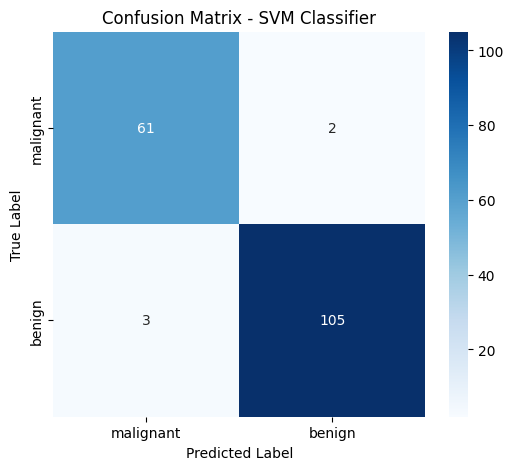

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
class_names = data.target_names

# Step 2: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train SVM classifier
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = model.predict(X_test)

# Step 6: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset (California Housing as Boston is deprecated)
data = fetch_california_housing()
X, y = data.data, data.target

# Step 2: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train SVR model
model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
model.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = model.predict(X_test)

# Step 6: Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.3688


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

ROC-AUC Score: 0.9927


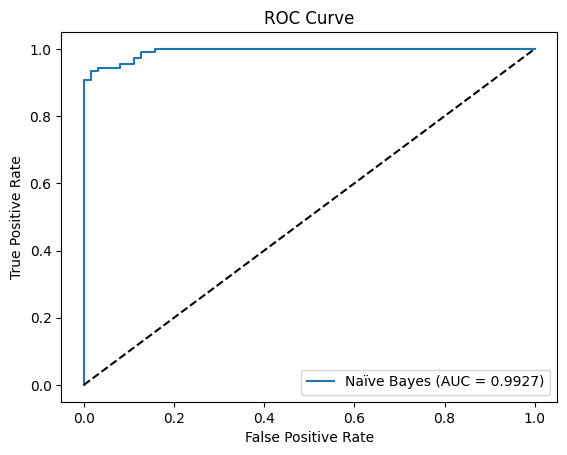

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Predict probabilities for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 7: Optional - Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Naïve Bayes (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

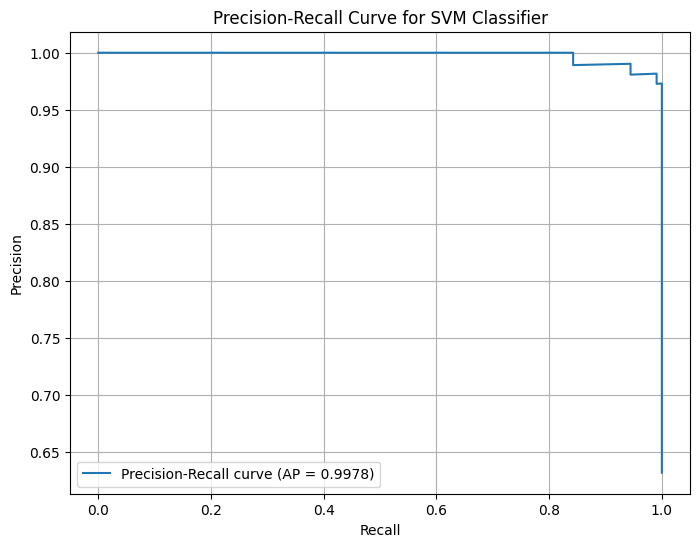

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Standardize features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train SVM classifier with probability estimates enabled
model = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict probabilities for positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Step 6: Compute Precision-Recall curve and average precision score
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Step 7: Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()
